In [156]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
np.__version__

'1.19.5'

## Representational data (task)

In [3]:
aggregated_results_rdsa = np.load('/external/rprshnas01/netdata_kcni/dflab/team/ma/ukb/imaging/rdsa_connectivity_221206.npy')
print(aggregated_results_rdsa.shape)


(30949, 180, 180)


In [4]:
with open('rdsa_rois.txt', 'r') as f:
    roi_list_rdsa = f.readlines()

roi_list_rdsa = [x.strip()[11:] for x in roi_list_rdsa[:-3]]
print(roi_list_rdsa)

['TE1m_ROI', 'TGd_ROI', 'TE2p_ROI', 'V4_ROI', 'VMV3_ROI', 'V3_ROI', 'd23ab_ROI', 'PHA2_ROI', 'a24pr_ROI', '10v_ROI', 'IFJa_ROI', 'FOP5_ROI', '3b_ROI', 'p47r_ROI', 's32_ROI', '31pv_ROI', 'V8_ROI', 'MIP_ROI', '4_ROI', 'STV_ROI', 'V4t_ROI', 'SCEF_ROI', '6r_ROI', 'p32_ROI', '8BM_ROI', 'PGs_ROI', 'PF_ROI', 'V3CD_ROI', 'pOFC_ROI', 'TPOJ3_ROI', '45_ROI', 'TF_ROI', '7AL_ROI', 'PBelt_ROI', '24dd_ROI', '1_ROI', 'STGa_ROI', 'STSva_ROI', 'FOP2_ROI', 'V7_ROI', 'PreS_ROI', '47l_ROI', 'a10p_ROI', 'PSL_ROI', '11l_ROI', '55b_ROI', 'PFop_ROI', 'a47r_ROI', 'TE1a_ROI', '8C_ROI', 'V1_ROI', 'p9_46v_ROI', 'PH_ROI', '24dv_ROI', 'STSda_ROI', '9m_ROI', 'POS2_ROI', 'PIT_ROI', 'IFSa_ROI', 'TE1p_ROI', 'FEF_ROI', 'Pir_ROI', 'PeEc_ROI', 'PEF_ROI', 'AIP_ROI', 'i6_8_ROI', 'H_ROI', 'LIPd_ROI', 'PoI1_ROI', 'PoI2_ROI', '9p_ROI', '10d_ROI', 'Ig_ROI', 'PFt_ROI', 'LO1_ROI', '3a_ROI', 'LO2_ROI', 'p24pr_ROI', 'PHT_ROI', 'IP0_ROI', 'LO3_ROI', 'OFC_ROI', 'V2_ROI', '31a_ROI', 'V3B_ROI', '5m_ROI', 'MST_ROI', 'VIP_ROI', '44_ROI', 

In [5]:
with open('/external/rprshnas01/netdata_kcni/dflab/team/ma/ukb/imaging/rdsa_subjects_221206.txt', 'r') as f:
    subject_list_rdsa = f.readlines()
subject_list_rdsa = [int(s.strip()) for s in subject_list_rdsa]
print(len(subject_list_rdsa))
print(subject_list_rdsa[0])

30949
4838018


<AxesSubplot:>

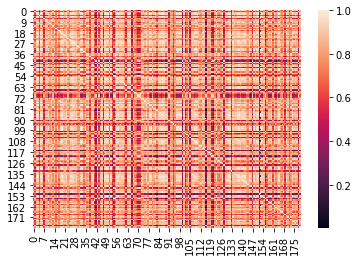

In [6]:
aggregated_results_rdsa_sample = aggregated_results_rdsa[0, :, :]
sns.heatmap(aggregated_results_rdsa_sample)

# Seed-based data (resting-state)

In [7]:
aggregated_results_seed = np.load('/external/rprshnas01/netdata_kcni/dflab/team/ma/ukb/imaging/seed_based_correlation_results.npy')
aggregated_results_seed = aggregated_results_seed / np.tile(np.reshape(np.diagonal(aggregated_results_seed, 0, 1, 2), (30949, 180, 1)), (1,1,180))
aggregated_results_seed[np.isinf(aggregated_results_seed)] = np.nan
aggregated_results_seed = aggregated_results_seed/2 + np.transpose(aggregated_results_seed, (0, 2, 1))/2
zero_abs = np.abs(aggregated_results_seed - np.nanmean(aggregated_results_seed, axis=(1,2), keepdims=True))
std_vals = np.nanstd(aggregated_results_seed, axis=(1,2), keepdims=True)
max_devs = 2.0
aggregated_results_seed[zero_abs > max_devs*std_vals] = np.nan
print(aggregated_results_seed.shape)


/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


(30949, 180, 180)


In [8]:
with open('/external/rprshnas01/kcni/mabdelhack/uk_biobank/tfmri/imaging/freesurfer_label_info/hcp180/roi_names_.txt', 'r') as f:
    roi_list_seed = f.readlines()
roi_list_seed = [s.strip() for s in roi_list_seed]
print(roi_list_seed)

['V1_ROI', 'MST_ROI', 'V6_ROI', 'V2_ROI', 'V3_ROI', 'V4_ROI', 'V8_ROI', '4_ROI', '3b_ROI', 'FEF_ROI', 'PEF_ROI', '55b_ROI', 'V3A_ROI', 'RSC_ROI', 'POS2_ROI', 'V7_ROI', 'IPS1_ROI', 'FFC_ROI', 'V3B_ROI', 'LO1_ROI', 'LO2_ROI', 'PIT_ROI', 'MT_ROI', 'A1_ROI', 'PSL_ROI', 'SFL_ROI', 'PCV_ROI', 'STV_ROI', '7Pm_ROI', '7m_ROI', 'POS1_ROI', '23d_ROI', 'v23ab_ROI', 'd23ab_ROI', '31pv_ROI', '5m_ROI', '5mv_ROI', '23c_ROI', '5L_ROI', '24dd_ROI', '24dv_ROI', '7AL_ROI', 'SCEF_ROI', '6ma_ROI', '7Am_ROI', '7PL_ROI', '7PC_ROI', 'LIPv_ROI', 'VIP_ROI', 'MIP_ROI', '1_ROI', '2_ROI', '3a_ROI', '6d_ROI', '6mp_ROI', '6v_ROI', 'p24pr_ROI', '33pr_ROI', 'a24pr_ROI', 'p32pr_ROI', 'a24_ROI', 'd32_ROI', '8BM_ROI', 'p32_ROI', '10r_ROI', '47m_ROI', '8Av_ROI', '8Ad_ROI', '9m_ROI', '8BL_ROI', '9p_ROI', '10d_ROI', '8C_ROI', '44_ROI', '45_ROI', '47l_ROI', 'a47r_ROI', '6r_ROI', 'IFJa_ROI', 'IFJp_ROI', 'IFSp_ROI', 'IFSa_ROI', 'p9_46v_ROI', '46_ROI', 'a9_46v_ROI', '9_46d_ROI', '9a_ROI', '10v_ROI', 'a10p_ROI', '10pp_ROI', '11l_

In [9]:
with open('/external/rprshnas01/netdata_kcni/dflab/team/ma/ukb/imaging/collected_subjects.txt', 'r') as f:
    subject_list_seed = f.readlines()
subject_list_seed = [int(s.strip()) for s in subject_list_seed]
print(len(subject_list_seed))
print(subject_list_seed[0])

30949
3578705


In [10]:
from bdpy.util import get_refdata
aggregated_results_seed_rearranged = get_refdata(aggregated_results_seed, np.array(subject_list_seed), np.array(subject_list_rdsa))
print(aggregated_results_seed_rearranged.shape)

(30949, 180, 180)


In [ ]:
roi_indices_conversions = [np.where(np.array(roi_list_seed) == i)[0][0] for i in np.array(roi_list_rdsa)]
aggregated_results_seed_rearranged_roi = aggregated_results_seed_rearranged[:, roi_indices_conversions, :]
aggregated_results_seed_rearranged_roi = aggregated_results_seed_rearranged_roi[:, :, roi_indices_conversions]
print(aggregated_results_seed_rearranged.shape)
print(aggregated_results_seed_rearranged_roi.shape)

In [ ]:
# aggregated_results_seed_rearranged_roi_sample = aggregated_results_seed_rearranged_roi[0,:,:]
# sns.heatmap(np.triu(aggregated_results_seed_rearranged_roi_sample, 1))
# print(np.triu(aggregated_results_seed_rearranged_roi_sample, 1))
# sns.heatmap(np.triu(aggregated_results_seed_rearranged_roi, 1)[2, :, :])
# # np.triu_indices(aggregated_results_seed_rearranged_roi, 1).shape
# np.fill_diagonal(aggregated_results_seed_rearranged_roi[0, :, :], 1)
# sns.heatmap(aggregated_results_seed_rearranged_roi[0, :, :])
for idx in range(aggregated_results_seed_rearranged_roi.shape[0]):
    np.fill_diagonal(aggregated_results_seed_rearranged_roi[idx, :, :], 1)
sns.heatmap(aggregated_results_seed_rearranged_roi[200, :, :])

In [ ]:
aggregated_results_seed_rearranged_flat = np.reshape(aggregated_results_seed_rearranged,
                                                     (aggregated_results_seed_rearranged.shape[0], -1))
aggregated_results_seed_rearranged_flat.shape

In [ ]:
aggregated_results_rdsa_flat = np.reshape(aggregated_results_rdsa,
                                          (aggregated_results_rdsa.shape[0], -1))
aggregated_results_rdsa_flat.shape

In [ ]:
correlation_values = list()
for idx in range(aggregated_results_rdsa_flat.shape[0]):
    corr_val = pd.DataFrame(aggregated_results_seed_rearranged_flat[idx,:]).corrwith(pd.DataFrame(aggregated_results_rdsa_flat[idx,:]))
    correlation_values.append(corr_val)

In [ ]:
correlation_values_df = pd.DataFrame(data=correlation_values, index=subject_list_rdsa)
correlation_values_df.index.rename('eid', inplace=True)
correlation_values_df.columns= ['corr']
correlation_values_df

In [ ]:
correlation_values_df.to_csv('representational_functional_connectivity_correlation.csv')

In [ ]:
mean_difference = np.abs(aggregated_results_seed_rearranged_flat - aggregated_results_rdsa_flat).mean(axis=1)

In [ ]:
mean_difference_df = pd.DataFrame(data=mean_difference, index=subject_list_rdsa)
mean_difference_df.index.rename('eid', inplace=True)
mean_difference_df.columns= ['mean_difference']
mean_difference_df

In [ ]:
mean_difference_df.to_csv('representational_functional_connectivity_mean_difference.csv')

In [ ]:
mean_resting = np.mean(aggregated_results_seed_rearranged_flat, axis=1)
mean_resting_df = pd.DataFrame(data=mean_resting, index=subject_list_rdsa)
mean_resting_df.index.rename('eid', inplace=True)
mean_resting_df.columns= ['mean_resting']
mean_resting_df

In [ ]:
mean_resting_df.to_csv('representational_functional_connectivity_mean_resting.csv')

In [ ]:
mean_task = np.mean(aggregated_results_rdsa_flat, axis=1)
mean_task_df = pd.DataFrame(data=mean_task, index=subject_list_rdsa)
mean_task_df.index.rename('eid', inplace=True)
mean_task_df.columns= ['mean_task']
mean_task_df

In [ ]:
mean_task_df.to_csv('representational_functional_connectivity_mean_task.csv')

In [ ]:
std_resting = np.std(aggregated_results_seed_rearranged_flat, axis=1)
std_resting_df = pd.DataFrame(data=std_resting, index=subject_list_rdsa)
std_resting_df.index.rename('eid', inplace=True)
std_resting_df.columns= ['std_resting']
std_resting_df

In [ ]:
std_resting_df.to_csv('representational_functional_connectivity_std_resting.csv')

In [ ]:
std_task = np.std(aggregated_results_rdsa_flat, axis=1)
std_task_df = pd.DataFrame(data=std_task, index=subject_list_rdsa)
std_task_df.index.rename('eid', inplace=True)
std_task_df.columns= ['std_task']
std_task_df

In [ ]:
std_task_df.to_csv('representational_functional_connectivity_std_task.csv')

In [ ]:
summary_stats = pd.concat([correlation_values_df, mean_difference_df, mean_resting_df, std_resting_df, mean_task_df, std_task_df], axis=1)
summary_stats.to_csv('representational_functional_connectivity_summary_stats.csv')

In [ ]:
summary_stats.info()

# OLS model

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multitest import fdrcorrection
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
summary_stats = pd.read_csv('representational_functional_connectivity_summary_stats.csv', index_col='eid')
summary_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30949 entries, 4838018 to 3971419
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   corr             30944 non-null  float64
 1   mean_difference  30944 non-null  float64
 2   mean_resting     30949 non-null  float64
 3   std_resting      30949 non-null  float64
 4   mean_task        30944 non-null  float64
 5   std_task         30944 non-null  float64
dtypes: float64(6)
memory usage: 1.7 MB


In [18]:
covariates_anatomy_df = pd.read_csv('covariates_task_230123.csv', index_col='eid')
print(covariates_anatomy_df.index)
covariates_anatomy_df = pd.concat((covariates_anatomy_df, pd.read_csv('tfmri_data_covariates_221205.csv', index_col='eid', \
                                    usecols=['eid', 'duration_of_longest_sleep_bout',
                                            'phq2',
                                            'Number_of_symbol_digit_matches_made_correctly',
                                             'Sleeplessness___insomnia',
                                            'Daytime_dozing___sleeping_narcolepsy'])), axis=1)
covariates_anatomy_df['sex'] = covariates_anatomy_df['sex'].astype("category")
covariates_anatomy_df['site'] = covariates_anatomy_df['site'].astype("category")
covariates_anatomy_df['ethnicity'] = covariates_anatomy_df['ethnicity'].astype("category")
covariates_anatomy_df['age'] = (covariates_anatomy_df['age'] - covariates_anatomy_df['age'].mean()) / covariates_anatomy_df['age'].std()
covariates_anatomy_df['ses'] = (covariates_anatomy_df['ses'] - covariates_anatomy_df['ses'].mean()) / covariates_anatomy_df['age'].std()
covariates_anatomy_df['education'] = (covariates_anatomy_df['education'] - covariates_anatomy_df['education'].mean()) / covariates_anatomy_df['education'].std()
covariates_anatomy_df['actigraphy_time'] = (covariates_anatomy_df['actigraphy_time'] - covariates_anatomy_df['actigraphy_time'].mean()) / covariates_anatomy_df['actigraphy_time'].std()
covariates_anatomy_df['head_motion'] = (covariates_anatomy_df['head_motion'] - covariates_anatomy_df['head_motion'].mean()) / covariates_anatomy_df['head_motion'].std()

# covariates_anatomy_df['phq2'] = (covariates_anatomy_df['phq2'] - covariates_anatomy_df['phq2'].min())
# covariates_anatomy_df['Sleeplessness___insomnia'] = (covariates_anatomy_df['Sleeplessness___insomnia'] - covariates_anatomy_df['Sleeplessness___insomnia'].min())
# covariates_anatomy_df['Daytime_dozing___sleeping_narcolepsy'] = (covariates_anatomy_df['Daytime_dozing___sleeping_narcolepsy'] - covariates_anatomy_df['Daytime_dozing___sleeping_narcolepsy'].min())

# covariates_anatomy_df['duration_of_longest_sleep_bout'] = (covariates_anatomy_df['duration_of_longest_sleep_bout'] - covariates_anatomy_df['duration_of_longest_sleep_bout'].mean()) / covariates_anatomy_df['duration_of_longest_sleep_bout'].std()
# # covariates_anatomy_df['phq2'] = (covariates_anatomy_df['phq2'] - covariates_anatomy_df['phq2'].mean()) / covariates_anatomy_df['phq2'].std()
# covariates_anatomy_df['Number_of_symbol_digit_matches_made_correctly'] = (covariates_anatomy_df['Number_of_symbol_digit_matches_made_correctly'] - covariates_anatomy_df['Number_of_symbol_digit_matches_made_correctly'].mean()) / covariates_anatomy_df['Number_of_symbol_digit_matches_made_correctly'].std()
# covariates_anatomy_df['Sleeplessness___insomnia'] = (covariates_anatomy_df['Sleeplessness___insomnia'] - covariates_anatomy_df['Sleeplessness___insomnia'].mean()) / covariates_anatomy_df['Sleeplessness___insomnia'].std()
# covariates_anatomy_df['Daytime_dozing___sleeping_narcolepsy'] = (covariates_anatomy_df['Daytime_dozing___sleeping_narcolepsy'] - covariates_anatomy_df['Daytime_dozing___sleeping_narcolepsy'].mean()) / covariates_anatomy_df['Daytime_dozing___sleeping_narcolepsy'].std()
print(covariates_anatomy_df.index)
covariates_anatomy_df.info()
#'duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy'])
# indep_vars_df.info()
# print(indep_vars_df.describe())

Int64Index([1000168, 1000177, 1000184, 1000359, 1000412, 1000464, 1000486,
            1000553, 1000613, 1000725,
            ...
            6024124, 6024240, 6024279, 6024509, 6024583, 6024685, 6024733,
            6024747, 6024794, 6024843],
           dtype='int64', name='eid', length=52343)
Int64Index([1000168, 1000177, 1000184, 1000359, 1000412, 1000464, 1000486,
            1000553, 1000613, 1000725,
            ...
            6024124, 6024240, 6024279, 6024509, 6024583, 6024685, 6024733,
            6024747, 6024794, 6024843],
           dtype='int64', name='eid', length=52343)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52343 entries, 1000168 to 6024843
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   age                                            52343 non-null  float64 
 1   sex                                            52343 

In [19]:
summary_stats = summary_stats - np.nanmean(summary_stats, axis=0, keepdims=True)
summary_stats = summary_stats / np.nanstd(summary_stats, axis=0, keepdims=True)
max_devs = 2.0
# (zero_abs > max_devs*std_vals)['mean_task'].value_counts()
for var in summary_stats.columns:
    summary_stats.loc[(summary_stats > max_devs)[var], var] = np.nan

In [22]:
def run_ols_models(data_df, stats_df, output_var, independent_var):
    print(output_var, independent_var)
    data_df['data'] = stats_df[output_var]
#     data_df.info()
    if independent_var == 'duration_of_longest_sleep_bout':
        lr_model = smf.ols('data ~ {} + C(site) + age + C(sex) + age:C(sex) + ses + education + C(ethnicity) + actigraphy_time + head_motion'.format(independent_var),
                           data=data_df)
    else:
        lr_model = smf.ols('data ~ {} + C(site) + age + C(sex) + age:C(sex) + ses + education + C(ethnicity) + head_motion'.format(independent_var),
                           data=data_df)
    lr_results = lr_model.fit()
    print(lr_results.summary())
    p_value = lr_results.pvalues[independent_var]
    t_value = lr_results.tvalues[independent_var]
    b_value = lr_results.params[independent_var]
    confidence_intervals = lr_results.conf_int(0.01).loc[independent_var]
    return p_value, t_value, b_value, confidence_intervals


In [23]:
summary_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30949 entries, 4838018 to 3971419
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   corr             29129 non-null  float64
 1   mean_difference  29213 non-null  float64
 2   mean_resting     30941 non-null  float64
 3   std_resting      29780 non-null  float64
 4   mean_task        30152 non-null  float64
 5   std_task         30773 non-null  float64
dtypes: float64(6)
memory usage: 2.9 MB


In [24]:
output_list = ['corr', 'mean_resting', 'mean_task']
indep_variable_list = ['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']
aggregated_b = pd.DataFrame(columns=indep_variable_list, index=output_list)
aggregated_t = pd.DataFrame(columns=indep_variable_list, index=output_list)
aggregated_p = pd.DataFrame(columns=indep_variable_list, index=output_list)
aggregated_upper = pd.DataFrame(columns=indep_variable_list, index=output_list)
aggregated_lower = pd.DataFrame(columns=indep_variable_list, index=output_list)


for output_var in output_list:
    for indep_var in indep_variable_list:
        pval, tval, bval, conf_int = run_ols_models(covariates_anatomy_df, summary_stats, output_var, indep_var)
        aggregated_p.loc[output_var, indep_var] = pval
        aggregated_t.loc[output_var, indep_var] = tval
        aggregated_b.loc[output_var, indep_var] = bval
        aggregated_upper.loc[output_var, indep_var] = conf_int[0]
        aggregated_lower.loc[output_var, indep_var] = conf_int[1]

corr duration_of_longest_sleep_bout
                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.908
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0181
Time:                        15:00:52   Log-Likelihood:                -16706.
No. Observations:               12196   AIC:                         3.344e+04
Df Residuals:                   12180   BIC:                         3.356e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.027
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0106
Time:                        15:00:54   Log-Likelihood:                -39281.
No. Observations:               28767   AIC:                         7.859e+04
Df Residuals:                   28751   BIC:                         7.873e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     109.8
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:00:56   Log-Likelihood:                -40919.
No. Observations:               29557   AIC:                         8.187e+04
Df Residuals:                   29541   BIC:                         8.200e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:00:58   Log-Likelihood:                -42526.
No. Observations:               30544   AIC:                         8.508e+04
Df Residuals:                   30528   BIC:                         8.522e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     10.47
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           4.54e-24
Time:                        15:01:00   Log-Likelihood:                -26364.
No. Observations:               18885   AIC:                         5.276e+04
Df Residuals:                   18870   BIC:                         5.288e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [25]:
aggregated_confint = np.abs(aggregated_upper - aggregated_lower)/2

In [26]:
aggregated_upper

,duration_of_longest_sleep_bout,phq2,Number_of_symbol_digit_matches_made_correctly,Sleeplessness___insomnia,Daytime_dozing___sleeping_narcolepsy
corr,-0.0124685,-0.0147969,-0.00671858,-0.02795,-0.0423976
mean_resting,-0.00298165,0.00892304,-0.00750833,0.0046319,-0.100437
mean_task,-0.00335549,-0.0429792,-0.00340792,-0.0408242,-0.0115875


In [27]:
aggregated_lower

,duration_of_longest_sleep_bout,phq2,Number_of_symbol_digit_matches_made_correctly,Sleeplessness___insomnia,Daytime_dozing___sleeping_narcolepsy
corr,0.0164505,0.0176319,0.0010661,0.0122258,0.0180279
mean_resting,0.0266666,0.0410439,-0.000263706,0.0446427,-0.0403077
mean_task,0.025942,-0.0100356,0.00442037,-1.43101e-05,0.0497813


In [28]:
aggregated_p

,duration_of_longest_sleep_bout,phq2,Number_of_symbol_digit_matches_made_correctly,Sleeplessness___insomnia,Daytime_dozing___sleeping_narcolepsy
corr,0.722798,0.821828,0.0614286,0.313363,0.298859
mean_resting,0.0396059,6.15937e-05,0.00572175,0.00151327,1.66233e-09
mean_task,0.0470436,3.40123e-05,0.739008,0.00994789,0.108899


In [29]:
aggregated_b

,duration_of_longest_sleep_bout,phq2,Number_of_symbol_digit_matches_made_correctly,Sleeplessness___insomnia,Daytime_dozing___sleeping_narcolepsy
corr,0.00199097,0.00141748,-0.00282624,-0.0078621,-0.0121848
mean_resting,0.0118425,0.0249835,-0.00388602,0.0246373,-0.0703725
mean_task,0.0112933,-0.0265074,0.000506226,-0.0204193,0.0190969


In [30]:
aggregated_confint

,duration_of_longest_sleep_bout,phq2,Number_of_symbol_digit_matches_made_correctly,Sleeplessness___insomnia,Daytime_dozing___sleeping_narcolepsy
corr,0.0144595,0.0162144,0.00389234,0.0200879,0.0302128
mean_resting,0.0148241,0.0160604,0.00362231,0.0200054,0.0300647
mean_task,0.0146487,0.0164718,0.00391415,0.020405,0.0306844


In [31]:
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, yerr=yerr, kind="bar", ax=ax, **kwargs)

In [32]:
# aggregated_t.reset_index().columns
aggregated_t_long = pd.melt(aggregated_b.reset_index(), id_vars='index', value_vars=aggregated_t.columns)
aggregated_confint_long = pd.melt(aggregated_confint.reset_index(), id_vars='index', value_vars=aggregated_t.columns)
aggregated_t_long['sem'] = aggregated_confint_long['value']
aggregated_t_long

,index,variable,value,sem
0,corr,duration_of_longest_sleep_bout,0.00199097,0.0144595
1,mean_resting,duration_of_longest_sleep_bout,0.0118425,0.0148241
2,mean_task,duration_of_longest_sleep_bout,0.0112933,0.0146487
3,corr,phq2,0.00141748,0.0162144
4,mean_resting,phq2,0.0249835,0.0160604
5,mean_task,phq2,-0.0265074,0.0164718
6,corr,Number_of_symbol_digit_matches_made_correctly,-0.00282624,0.00389234
7,mean_resting,Number_of_symbol_digit_matches_made_correctly,-0.00388602,0.00362231
8,mean_task,Number_of_symbol_digit_matches_made_correctly,0.000506226,0.00391415
9,corr,Sleeplessness___insomnia,-0.0078621,0.0200879


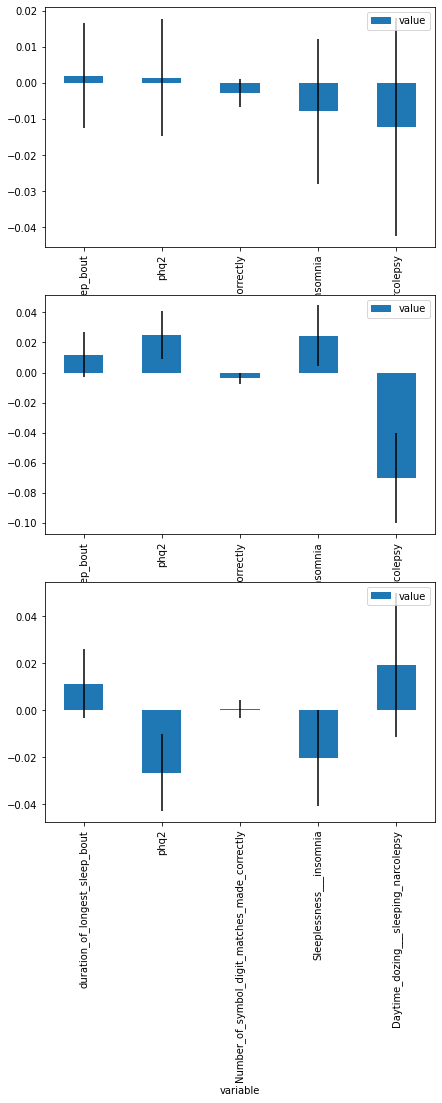

In [41]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,1, figsize=(7,15))
for idx, output_var in enumerate(output_list):
    aggregated_t_long.query('index == "{}"'.format(output_var)).plot( x='variable', y='value', yerr='sem', kind="bar", ax=axes[idx])
fig.savefig('brainwide_mean_connectivity_betas_230217.pdf', facecolor='white', dpi=600) 

In [85]:
aggregated_t.columns

Index(['duration_of_longest_sleep_bout', 'phq2',
       'Number_of_symbol_digit_matches_made_correctly',
       'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy'],
      dtype='object')

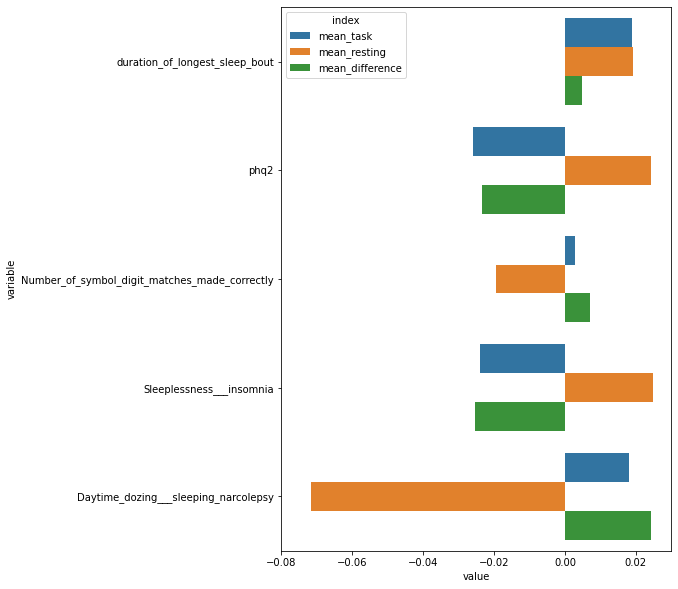

In [174]:
selected_values2plot = ['mean_task', 'mean_resting', 'mean_difference']
plot_resulting_t = pd.melt(aggregated_b.loc[selected_values2plot, :].reset_index(), id_vars='index', value_vars=aggregated_t.columns)
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,1, figsize=(7,10))
sns.barplot(data=plot_resulting_t, y='variable', x='value', hue='index')
axes.set_xlim([-0.08, 0.03])
fig.savefig('rep_con_values_230113.pdf', facecolor='white', dpi=600) 

In [98]:
aggregated_t_long['index'].isin(selected_values2plot)

0     False
1      True
2      True
3     False
4      True
5     False
6     False
7      True
8      True
9     False
10     True
11    False
12    False
13     True
14     True
15    False
16     True
17    False
18    False
19     True
20     True
21    False
22     True
23    False
24    False
25     True
26     True
27    False
28     True
29    False
Name: index, dtype: bool

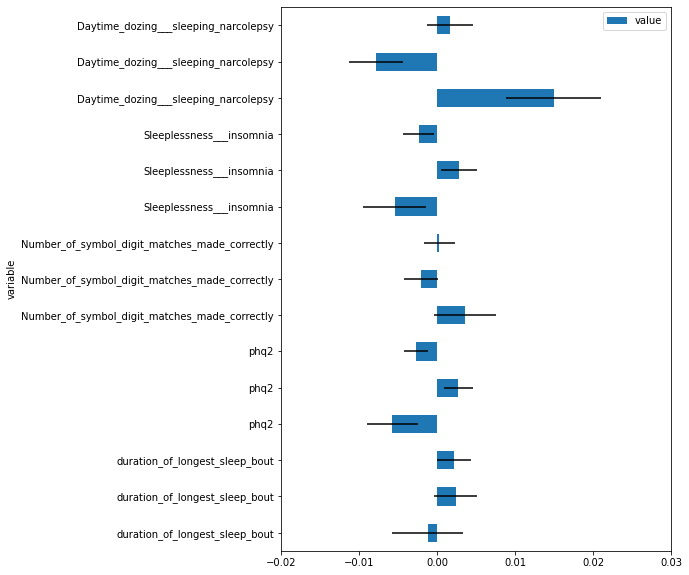

In [104]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,1, figsize=(7,10))
# g = sns.barplot(data=aggregated_t_long, x='variable', y='value', hue='index')
aggregated_t_long.loc[aggregated_t_long['index'].isin(selected_values2plot)].plot( x='variable', y='value', xerr='sem', kind="barh", ax=axes)
axes.set_xlim([-0.02, 0.03])
fig.savefig('rep_con_errorbars_230109.pdf', facecolor='white', dpi=600) 

In [141]:
summary_stats_cov = summary_stats.merge(covariates_anatomy_df[indep_variable_list], left_index=True, right_index=True)
summary_stats_cov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30862 entries, 4838018 to 3971419
Data columns (total 11 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   corr                                           29333 non-null  float64
 1   mean_difference                                30141 non-null  float64
 2   mean_resting                                   29611 non-null  float64
 3   std_resting                                    30701 non-null  float64
 4   mean_task                                      29679 non-null  float64
 5   std_task                                       29413 non-null  float64
 6   duration_of_longest_sleep_bout                 12993 non-null  float64
 7   phq2                                           29650 non-null  float64
 8   Number_of_symbol_digit_matches_made_correctly  19415 non-null  float64
 9   Sleeplessness___insomnia                  

<AxesSubplot:xlabel='mean_resting', ylabel='Density'>

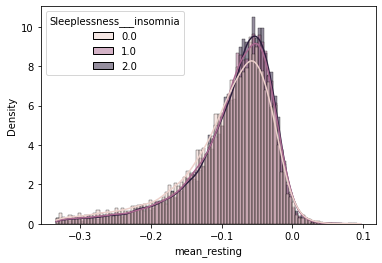

In [155]:
# summary_stats_cov

sns.histplot(hue='Sleeplessness___insomnia', x='mean_resting', data=summary_stats_cov, kde=True, stat='density', common_norm=False)

<AxesSubplot:>

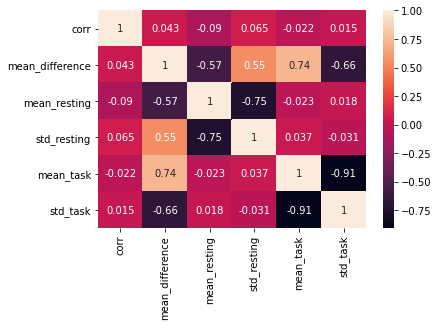

In [129]:
sns.heatmap(summary_stats.corr(), annot=True)

In [72]:
output_list = ['corr', 'mean_difference', 'mean_resting', 'std_resting', 'mean_task', 'std_task']
indep_variable_list = ['import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,1, figsize=(15,7))
sns.barplot(data=aggregated_t_long, y='variable', x='value', hue='index')
# fig.savefig('rep_con_values.png', facecolor='white', dpi=600) ', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']
aggregated_b = pd.DataFrame(columns=indep_variable_list, index=output_list)
aggregated_t = pd.DataFrame(columns=indep_variable_list, index=output_list)
aggregated_p = pd.DataFrame(columns=indep_variable_list, index=output_list)
for output_var in output_list:
    for indep_var in indep_variable_list:
        pval, tval, bval = run_ols_models(covariates_anatomy_df.loc[covariates_anatomy_df['duration_of_longest_sleep_bout'] < covariates_anatomy_df['duration_of_longest_sleep_bout'].median(), :], 
                                          summary_stats, output_var, indep_var)
        aggregated_p.loc[output_var, indep_var] = pval
        aggregated_t.loc[output_var, indep_var] = tval
        aggregated_b.loc[output_var, indep_var] = bval

corr duration_of_longest_sleep_bout
                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.844
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           0.000160
Time:                        00:16:12   Log-Likelihood:                 13546.
No. Observations:                6492   AIC:                        -2.707e+04
Df Residuals:                    6483   BIC:                        -2.701e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.038
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           0.000201
Time:                        00:16:12   Log-Likelihood:                 13016.
No. Observations:                6235   AIC:                        -2.602e+04
Df Residuals:                    6227   BIC:                        -2.596e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     4.465
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           5.74e-05
Time:                        00:16:12   Log-Likelihood:                 13452.
No. Observations:                6444   AIC:                        -2.689e+04
Df Residuals:                    6436   BIC:                        -2.683e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     19.50
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.55e-29
Time:                        00:16:13   Log-Likelihood:                 1464.9
No. Observations:                6492   AIC:                            -2912.
Df Residuals:                    6483   BIC:                            -2851.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packag

mean_difference Sleeplessness___insomnia
                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     22.39
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           3.79e-30
Time:                        00:16:13   Log-Likelihood:                 1441.5
No. Observations:                6444   AIC:                            -2867.
Df Residuals:                    6436   BIC:                            -2813.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     51.47
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.56e-81
Time:                        00:16:13   Log-Likelihood:                 4880.0
No. Observations:                6492   AIC:                            -9742.
Df Residuals:                    6483   BIC:                            -9681.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     30.09
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           1.03e-40
Time:                        00:16:13   Log-Likelihood:                 2700.1
No. Observations:                3662   AIC:                            -5384.
Df Residuals:                    3654   BIC:                            -5335.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     56.71
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           3.29e-79
Time:                        00:16:14   Log-Likelihood:                 4820.6
No. Observations:                6442   AIC:                            -9625.
Df Residuals:                    6434   BIC:                            -9571.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packag

                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.318
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           2.06e-07
Time:                        00:16:14   Log-Likelihood:                -7162.7
No. Observations:                6235   AIC:                         1.434e+04
Df Residuals:                    6227   BIC:                         1.440e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packag

std_resting Daytime_dozing___sleeping_narcolepsy
                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     7.541
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           4.46e-09
Time:                        00:16:14   Log-Likelihood:                -7430.8
No. Observations:                6442   AIC:                         1.488e+04
Df Residuals:                    6434   BIC:                         1.493e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packag

mean_task phq2
                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.24
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           8.00e-13
Time:                        00:16:14   Log-Likelihood:                 5917.0
No. Observations:                6235   AIC:                        -1.182e+04
Df Residuals:                    6227   BIC:                        -1.176e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     18.65
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           6.34e-28
Time:                        00:16:15   Log-Likelihood:                 11192.
No. Observations:                6492   AIC:                        -2.237e+04
Df Residuals:                    6483   BIC:                        -2.230e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                   data   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     14.13
Date:                Sat, 17 Dec 2022   Prob (F-statistic):           3.32e-18
Time:                        00:16:15   Log-Likelihood:                 6354.3
No. Observations:                3662   AIC:                        -1.269e+04
Df Residuals:                    3654   BIC:                        -1.264e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
aggregated_t

,duration_of_longest_sleep_bout,phq2,Number_of_symbol_digit_matches_made_correctly,Sleeplessness___insomnia,Daytime_dozing___sleeping_narcolepsy
corr,1.62412,1.87912,0.248608,-1.94684,-0.613966
mean_difference,0.144824,-2.11568,0.110611,-1.73639,4.0378
mean_resting,0.563317,2.23786,-0.828629,1.72513,-3.54315
std_resting,0.436065,-0.718758,0.986638,-1.00594,2.1213
mean_task,1.80877,-1.87125,-1.28924,-0.534289,2.43027
std_task,-1.4626,1.97931,0.848471,0.557928,-1.94299


In [74]:
aggregated_p

,duration_of_longest_sleep_bout,phq2,Number_of_symbol_digit_matches_made_correctly,Sleeplessness___insomnia,Daytime_dozing___sleeping_narcolepsy
corr,0.104399,0.0602755,0.803678,0.0515975,0.539259
mean_difference,0.884854,0.0344112,0.911931,0.0825425,5.45821e-05
mean_resting,0.573239,0.0252656,0.407368,0.0845516,0.000398179
std_resting,0.662804,0.472317,0.323886,0.314481,0.033935
mean_task,0.0705325,0.0613573,0.197396,0.59316,0.0151147
std_task,0.143626,0.0478256,0.396231,0.576913,0.0520611


In [40]:
covariates_anatomy_df.loc[covariates_anatomy_df['duration_of_longest_sleep_bout'] < covariates_anatomy_df['duration_of_longest_sleep_bout'].median(), :]

,sex,site,age,actigraphy_time,head_motion,response_time_mean_y,accuracy_mean_y,response_time_std_y,Sleeplessness___insomnia,Number_of_symbol_digit_matches_made_correctly,...,roi_hcp180_p24pr_ROI,roi_hcp180_p32_ROI,roi_hcp180_p32pr_ROI,roi_hcp180_p47r_ROI,roi_hcp180_p9_46v_ROI,roi_hcp180_pOFC_ROI,roi_hcp180_s32_ROI,roi_hcp180_s6_8_ROI,roi_hcp180_v23ab_ROI,data
eid,,,,,,,,,,,,,,,,,,,,,
1001430,Female,Cheadle (imaging),-0.265308,1.243645,-0.346524,-0.014506,0.223735,0.174650,1.0,0.743019,...,0.600000,0.766667,0.766667,0.850000,0.850000,0.750000,0.700000,0.566667,0.633333,0.166638
1001531,Female,Cheadle (imaging),2.021300,1.022709,-0.126321,0.532244,-0.225172,1.105255,0.0,-1.935673,...,0.750000,0.700000,0.650000,0.866667,0.750000,0.666667,0.800000,0.716667,0.550000,0.171288
1001813,Female,Cheadle (imaging),0.914836,-1.366848,-0.717449,-0.448754,0.223735,-0.426164,1.0,NaN,...,0.633333,0.783333,0.616667,0.883333,0.883333,0.616667,0.766667,0.583333,0.816667,0.183558
1002206,Male,Cheadle (imaging),0.951903,-0.920275,0.056769,-0.179215,-0.045609,0.526125,0.0,NaN,...,0.500000,0.766667,0.450000,0.716667,0.750000,0.750000,0.783333,0.733333,0.566667,0.088843
1002358,Female,Cheadle (imaging),0.609711,-0.904606,2.187535,0.192819,0.223735,-0.399666,1.0,NaN,...,0.533333,0.716667,0.583333,0.783333,0.550000,0.600000,0.733333,0.550000,0.550000,0.186727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017050,Male,Cheadle (imaging),0.700920,-1.114574,0.219503,1.096925,0.493079,-0.100834,0.0,NaN,...,0.750000,0.783333,0.716667,0.816667,0.950000,0.850000,0.766667,0.683333,0.733333,0.046736
6017328,Female,Cheadle (imaging),-1.258378,-1.355880,-0.961188,-0.075553,0.582860,-0.605642,1.0,NaN,...,0.783333,0.883333,0.550000,0.650000,0.850000,0.633333,0.816667,0.500000,0.833333,0.149746
6017974,Female,Cheadle (imaging),0.682660,-0.252766,0.030323,0.944809,0.493079,-0.462323,1.0,NaN,...,0.766667,0.783333,0.700000,0.883333,0.933333,0.666667,0.883333,0.733333,0.700000,0.132076


## Mean difference models

In [141]:
covariates_anatomy_df['data'] = mean_difference_df['mean_difference']
independent_var = 'duration_of_longest_sleep_bout'
lr_model = smf.ols('data ~ {} + C(site) + age + C(sex) + age:C(sex) + head_motion'.format(independent_var),
                   data=covariates_anatomy_df)
lr_results = lr_model.fit()
lr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     14.27
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.37e-18
Time:                        17:52:26   Log-Likelihood:                 11249.
No. Observations:               12825   AIC:                        -2.248e+04
Df Residuals:                   12817   BIC:                        -2.242e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.8129      0.004    197.237      0.000       0.805       0.821
C(site)[T.Newcastle (imaging)]    -0.0008      0.002     -0.391      0.696      -0.005       0.003
C(site)[T.Reading (imaging)]      -0.0081      0.003     -2.875      0.004      -0.014      -0.003
C(sex)[T.Male]                     0.0166      0.002      9.099      0.000       0.013       0.020
duration_of_longest_sleep_bout     0.0011      0.001      1.898      0.058   -3.58e-05       0.002
age                               -0.0005      0.001     -0.407      0.684      -0.003       0.002
age:C(sex)[T.Male]                 0.0001      0.002      0.060      0.952      -0.003       0.004
head_motion                       -0.0028      0.001     -2.982      0.003      -0.005      -0.001
==============================================================================
Omnibus:                       46.766   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.532
Skew:                          -0.000   Prob(JB):                     1.92e-08
Kurtosis:                       2.742   Cond. No.                         32.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [142]:
covariates_anatomy_df['data'] = mean_difference_df['mean_difference']
independent_var = 'phq2'
lr_model = smf.ols('data ~ {} + C(site) + age + C(sex) + age:C(sex) + head_motion'.format(independent_var),
                   data=covariates_anatomy_df)
lr_results = lr_model.fit()
lr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     38.40
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           4.87e-54
Time:                        17:52:32   Log-Likelihood:                 25583.
No. Observations:               29307   AIC:                        -5.115e+04
Df Residuals:                   29299   BIC:                        -5.108e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.8193      0.001    838.382      0.000       0.817       0.821
C(site)[T.Newcastle (imaging)]     0.0002      0.001      0.152      0.879      -0.003       0.003
C(site)[T.Reading (imaging)]      -0.0065      0.002     -3.417      0.001      -0.010      -0.003
C(sex)[T.Male]                     0.0171      0.001     14.383      0.000       0.015       0.019
phq2                              -0.0040      0.001     -6.100      0.000      -0.005      -0.003
age                               -0.0002      0.001     -0.256      0.798      -0.002       0.001
age:C(sex)[T.Male]                -0.0011      0.001     -0.958      0.338      -0.003       0.001
head_motion                       -0.0015      0.001     -2.450      0.014      -0.003      -0.000
==============================================================================
Omnibus:                       67.312   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.114
Skew:                           0.012   Prob(JB):                     1.78e-12
Kurtosis:                       2.791   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
covariates_anatomy_df['data'] = mean_difference_df['mean_difference']
independent_var = 'Number_of_symbol_digit_matches_made_correctly'
lr_model = smf.ols('data ~ {} + C(site) + age + C(sex) + age:C(sex) + head_motion'.format(independent_var),
                   data=covariates_anatomy_df)
lr_results = lr_model.fit()
lr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     22.98
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.91e-31
Time:                        17:52:59   Log-Likelihood:                 16902.
No. Observations:               19152   AIC:                        -3.379e+04
Df Residuals:                   19144   BIC:                        -3.372e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         0.8083      0.003    250.732      0.000       0.802       0.815
C(site)[T.Newcastle (imaging)]                    0.0055      0.002      3.390      0.001       0.002       0.009
C(site)[T.Reading (imaging)]                     -0.0026      0.002     -1.267      0.205      -0.007       0.001
C(sex)[T.Male]                                    0.0170      0.001     11.618      0.000       0.014       0.020
Number_of_symbol_digit_matches_made_correctly     0.0002      0.000      1.618      0.106   -5.27e-05       0.001
age                                              -0.0010      0.001     -0.870      0.384      -0.003       0.001
age:C(sex)[T.Male]                                0.0015      0.001      1.009      0.313      -0.001       0.004
head_motion                                      -0.0019      0.001     -2.509      0.012      -0.003      -0.000
==============================================================================
Omnibus:                       31.547   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.331
Skew:                          -0.011   Prob(JB):                     1.92e-06
Kurtosis:                       2.820   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
covariates_anatomy_df['data'] = mean_difference_df['mean_difference']
independent_var = 'Sleeplessness___insomnia'
lr_model = smf.ols('data ~ {} + C(site) + age + C(sex) + age:C(sex) + head_motion'.format(independent_var),
                   data=covariates_anatomy_df)
lr_results = lr_model.fit()
lr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     37.32
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           1.92e-52
Time:                        17:53:04   Log-Likelihood:                 26431.
No. Observations:               30301   AIC:                        -5.285e+04
Df Residuals:                   30293   BIC:                        -5.278e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.8218      0.001    616.870      0.000       0.819       0.824
C(site)[T.Newcastle (imaging)]     0.0002      0.001      0.163      0.871      -0.002       0.003
C(site)[T.Reading (imaging)]      -0.0069      0.002     -3.681      0.000      -0.011      -0.003
C(sex)[T.Male]                     0.0167      0.001     14.108      0.000       0.014       0.019
Sleeplessness___insomnia          -0.0036      0.001     -4.393      0.000      -0.005      -0.002
age                                0.0003      0.001      0.414      0.679      -0.001       0.002
age:C(sex)[T.Male]                -0.0012      0.001     -1.041      0.298      -0.004       0.001
head_motion                       -0.0017      0.001     -2.843      0.004      -0.003      -0.001
==============================================================================
Omnibus:                       72.936   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.215
Skew:                           0.008   Prob(JB):                     2.28e-13
Kurtosis:                       2.786   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
covariates_anatomy_df['data'] = mean_difference_df['mean_difference']
independent_var = 'Daytime_dozing___sleeping_narcolepsy'
lr_model = smf.ols('data ~ {} + C(site) + age + C(sex) + age:C(sex) + head_motion'.format(independent_var),
                   data=covariates_anatomy_df)
lr_results = lr_model.fit()
lr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     35.89
Date:                Thu, 15 Dec 2022   Prob (F-statistic):           2.46e-50
Time:                        17:53:13   Log-Likelihood:                 26418.
No. Observations:               30286   AIC:                        -5.282e+04
Df Residuals:                   30278   BIC:                        -5.275e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.8167      0.001    850.570      0.000       0.815       0.819
C(site)[T.Newcastle (imaging)]           0.0002      0.001      0.176      0.861      -0.002       0.003
C(site)[T.Reading (imaging)]            -0.0068      0.002     -3.641      0.000      -0.010      -0.003
C(sex)[T.Male]                           0.0173      0.001     14.720      0.000       0.015       0.020
Daytime_dozing___sleeping_narcolepsy     0.0037      0.001      3.047      0.002       0.001       0.006
age                                      0.0003      0.001      0.320      0.749      -0.001       0.002
age:C(sex)[T.Male]                      -0.0015      0.001     -1.310      0.190      -0.004       0.001
head_motion                             -0.0018      0.001     -3.054      0.002      -0.003      -0.001
==============================================================================
Omnibus:                       73.302   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.494
Skew:                           0.009   Prob(JB):                     1.99e-13
Kurtosis:                       2.785   Cond. No.                         4.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""